In [3]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import OneHotEncoder
from sklearn.metrics import confusion_matrix
from sklearn import metrics

In [4]:
data = pd.read_csv('/content/Eps2-Data-train.csv')
print(data.isnull().sum())
data.drop(columns=['Cabin', 'Name', 'Ticket', 'PassengerId'], inplace=True)
data

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64


,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
0,0,3,male,22.0,1,0,7.2500,S
1,1,1,female,38.0,1,0,71.2833,C
2,1,3,female,26.0,0,0,7.9250,S
3,1,1,female,35.0,1,0,53.1000,S
4,0,3,male,35.0,0,0,8.0500,S
...,...,...,...,...,...,...,...,...
886,0,2,male,27.0,0,0,13.0000,S
887,1,1,female,19.0,0,0,30.0000,S
888,0,3,female,NaN,1,2,23.4500,S
889,1,1,male,26.0,0,0,30.0000,C


In [5]:
data.fillna(data.select_dtypes(include='number').mean(), inplace=True)
data['Embarked'].fillna(data['Embarked'].mode()[0], inplace=True)

<ipython-input-5-4d53e55a4e16>:2: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  data['Embarked'].fillna(data['Embarked'].mode()[0], inplace=True)


In [6]:
data.dropna(inplace=True, axis=1)
data
print(data.isnull().sum())

Survived    0
Pclass      0
Sex         0
Age         0
SibSp       0
Parch       0
Fare        0
Embarked    0
dtype: int64


In [7]:
enc = OneHotEncoder(sparse_output=False)
pclass_enc = enc.fit_transform(data[['Pclass']])
pclass_enc_df = pd.DataFrame(pclass_enc, columns=enc.get_feature_names_out(['Pclass']))
data = pd.concat([data, pclass_enc_df], axis=1)

In [8]:
sex_enc = enc.fit_transform(data[['Sex']])
sex_enc_df = pd.DataFrame(sex_enc, columns=enc.get_feature_names_out(['Sex']))
data = pd.concat([data, sex_enc_df], axis=1)

In [9]:
embarked_enc = enc.fit_transform(data[['Embarked']])
embarked_enc_df = pd.DataFrame(embarked_enc, columns=enc.get_feature_names_out(['Embarked']))
data = pd.concat([data, embarked_enc_df], axis=1)

In [10]:
data.drop(columns=['Pclass', 'Sex', 'Embarked'], inplace=True)

In [11]:
xdata = data.drop('Survived', axis=1)
ydata = data['Survived']

In [12]:
xtrain, xtest, ytrain, ytest = train_test_split(xdata, ydata, test_size=0.3, random_state=1)

In [13]:
clf = DecisionTreeClassifier(max_depth=5, min_samples_split=10)

In [14]:
clf.fit(xtrain, ytrain)

DecisionTreeClassifier(max_depth=5, min_samples_split=10)

In [15]:
ypred=clf.predict(xtest)

In [16]:
print(f"Akurasi Decision Tree: ", metrics.accuracy_score(ytest, ypred)*100, "%")

Akurasi Decision Tree:  78.35820895522389 %


Decision Tree Accuracy: 78.358209%


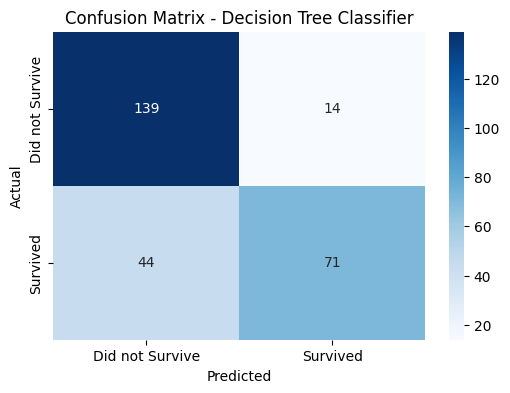

In [17]:
accuracy = metrics.accuracy_score(ytest, ypred) * 100
print(f"Decision Tree Accuracy: {accuracy:.6f}%")

conf_matrix = confusion_matrix(ytest, ypred, labels=[0, 1])

plt.figure(figsize=(6, 4))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues', xticklabels=['Did not Survive', 'Survived'], yticklabels=['Did not Survive', 'Survived'])
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix - Decision Tree Classifier')
plt.show()


**Stochastic Gradient Descent**

In [18]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.linear_model import SGDClassifier
from sklearn import metrics
from sklearn.preprocessing import OneHotEncoder
import matplotlib.pyplot as plt
import seaborn as sns

data = pd.read_csv('/content/Eps2-Data-train.csv')

data.drop(columns=['Cabin', 'Name', 'Ticket', 'PassengerId'], inplace=True)

In [19]:
enc = OneHotEncoder(sparse_output=False)
sex_enc = enc.fit_transform(data[['Sex']])
sex_enc_df = pd.DataFrame(sex_enc, columns=enc.get_feature_names_out(['Sex']))

In [20]:
pclass_enc = enc.fit_transform(data[['Pclass']])
pclass_enc_df = pd.DataFrame(pclass_enc, columns=enc.get_feature_names_out(['Pclass']))

In [21]:
data.fillna(data.select_dtypes(include='number').mean(), inplace=True)
data['Embarked'].fillna(data['Embarked'].mode()[0], inplace=True)
embarked_enc = enc.fit_transform(data[['Embarked']])
embarked_enc_df = pd.DataFrame(embarked_enc, columns=enc.get_feature_names_out(['Embarked']))
data = pd.concat([data, sex_enc_df, embarked_enc_df, pclass_enc_df], axis=1)

<ipython-input-21-64dabff02e99>:2: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  data['Embarked'].fillna(data['Embarked'].mode()[0], inplace=True)


Stochastic Gradient Descent: 78.358209%


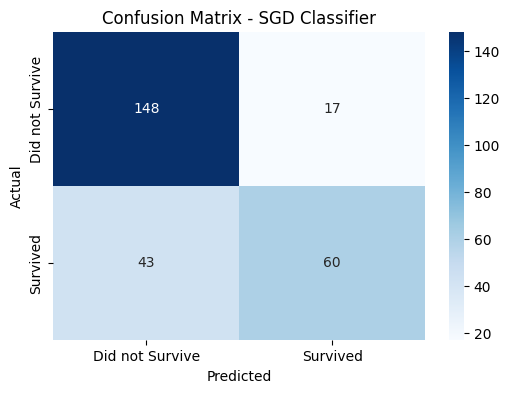

In [22]:
xtrain, xtest, ytrain, ytest = train_test_split(xdata, ydata, test_size=0.3, random_state=42, stratify=ydata)

clf_sgd = SGDClassifier(random_state=1)
clf_sgd.fit(xtrain, ytrain)

ypred_sgd = clf_sgd.predict(xtest)

accuracy_sgd = metrics.accuracy_score(ytest, ypred_sgd) * 100
print(f"Stochastic Gradient Descent: {accuracy:.6f}%")
conf_matrix = metrics.confusion_matrix(ytest, ypred_sgd)

plt.figure(figsize=(6, 4))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues', xticklabels=['Did not Survive', 'Survived'], yticklabels=['Did not Survive', 'Survived'])
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix - SGD Classifier')
plt.show()

**K-Nearest Neighbors**

In [23]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.preprocessing import OneHotEncoder
from sklearn import metrics

data = pd.read_csv('/content/Eps2-Data-train.csv')

data.drop(columns=['Cabin', 'Name', 'Ticket', 'PassengerId'], inplace=True)

In [24]:
enc = OneHotEncoder(sparse_output=False)

sex_enc = enc.fit_transform(data[['Sex']])
sex_enc_df = pd.DataFrame(sex_enc, columns=enc.get_feature_names_out(['Sex']))

In [25]:
data.fillna(data.select_dtypes(include='number').mean(), inplace=True)
data['Embarked'].fillna(data['Embarked'].mode()[0], inplace=True)

embarked_enc = enc.fit_transform(data[['Embarked']])
embarked_enc_df = pd.DataFrame(embarked_enc, columns=enc.get_feature_names_out(['Embarked']))

<ipython-input-25-a195c787d5f7>:2: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  data['Embarked'].fillna(data['Embarked'].mode()[0], inplace=True)


In [26]:
pclass_enc = enc.fit_transform(data[['Pclass']])
pclass_enc_df = pd.DataFrame(pclass_enc, columns=enc.get_feature_names_out(['Pclass']))
data = pd.concat([data, sex_enc_df, embarked_enc_df, pclass_enc_df], axis=1)

In [27]:
data.drop(columns=['Pclass', 'Sex', 'Embarked'], inplace=True)

xdata = data.drop('Survived', axis=1)
ydata = data['Survived']

Akurasi K-Nearest Neighbors: 70.522388%


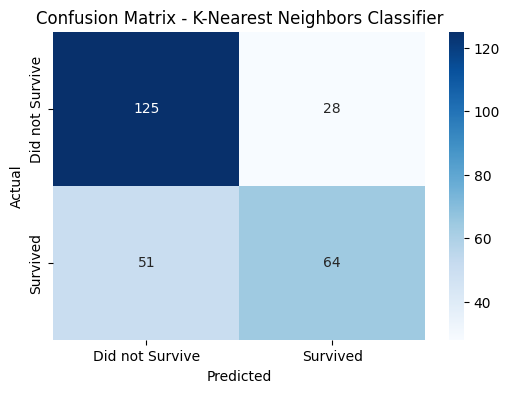

In [28]:
xtrain, xtest, ytrain, ytest = train_test_split(xdata, ydata, test_size=0.3, random_state=1)

knn = KNeighborsClassifier(n_neighbors=5)
knn.fit(xtrain, ytrain)

ypred_knn = knn.predict(xtest)

accuracy_knn = metrics.accuracy_score(ytest, ypred_knn) * 100
print(f"Akurasi K-Nearest Neighbors: {accuracy_knn:.6f}%")

conf_matrix_knn = confusion_matrix(ytest, ypred_knn)

plt.figure(figsize=(6, 4))
sns.heatmap(conf_matrix_knn, annot=True, fmt='d', cmap='Blues', xticklabels=['Did not Survive', 'Survived'], yticklabels=['Did not Survive', 'Survived'])
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix - K-Nearest Neighbors Classifier')
plt.show()

In [29]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.neighbors import KNeighborsClassifier
from sklearn.linear_model import SGDClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import OneHotEncoder
from sklearn.metrics import confusion_matrix, classification_report, roc_curve, roc_auc_score, accuracy_score, precision_score, recall_score, f1_score
from sklearn import metrics

In [30]:
data = pd.read_csv('/content/Eps2-Data-train.csv')
data.drop(columns=['Cabin', 'Name', 'Ticket', 'PassengerId'], inplace=True)

In [31]:
enc = OneHotEncoder(sparse_output=False)

sex_enc = enc.fit_transform(data[['Sex']])
sex_enc_df = pd.DataFrame(sex_enc, columns=enc.get_feature_names_out(['Sex']))

In [32]:
data.fillna(data.select_dtypes(include='number').mean(), inplace=True)
data['Embarked'].fillna(data['Embarked'].mode()[0], inplace=True)

embarked_enc = enc.fit_transform(data[['Embarked']])
embarked_enc_df = pd.DataFrame(embarked_enc, columns=enc.get_feature_names_out(['Embarked']))

<ipython-input-32-a195c787d5f7>:2: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  data['Embarked'].fillna(data['Embarked'].mode()[0], inplace=True)


In [33]:
pclass_enc = enc.fit_transform(data[['Pclass']])
pclass_enc_df = pd.DataFrame(pclass_enc, columns=enc.get_feature_names_out(['Pclass']))
data = pd.concat([data, sex_enc_df, embarked_enc_df, pclass_enc_df], axis=1)

In [34]:
data.drop(columns=['Pclass', 'Sex', 'Embarked'], inplace=True)

X = data.drop('Survived', axis=1)
y = data.Survived
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=27)

In [35]:
KNN = KNeighborsClassifier().fit(X_train, y_train)
KNN_pred = KNN.predict(X_test)
KNN_probs = KNN.predict_proba(X_test)[:,1]
KNN_roc_auc = roc_auc_score(y_test, KNN_probs)
knn_fpr, knn_tpr, _ = roc_curve(y_test, KNN_probs)

In [36]:
sgd = SGDClassifier(loss='log_loss').fit(X_train, y_train)
sgd_pred = sgd.predict(X_test)
sgd_probs = sgd.decision_function(X_test)
sgd_roc_auc = roc_auc_score(y_test, sgd_probs)
sgd_fpr, sgd_tpr, _ = roc_curve(y_test, sgd_probs)

In [37]:
tree = DecisionTreeClassifier(random_state=500).fit(X_train, y_train)
tree_pred = tree.predict(X_test)
tree_probs = tree.predict_proba(X_test)[:,1]
tree_roc_auc = roc_auc_score(y_test, tree_probs)
tree_fpr, tree_tpr, _ = roc_curve(y_test, tree_probs)

In [38]:
pd.crosstab(y_test, KNN_pred, rownames=['Actual'], colnames=['Predicted'], margins=True)

Predicted,0,1,All
Actual,,,
0,128,39,167
1,47,54,101
All,175,93,268


In [39]:
print(classification_report(y_test, KNN_pred))

              precision    recall  f1-score   support

           0       0.73      0.77      0.75       167
           1       0.58      0.53      0.56       101

    accuracy                           0.68       268
   macro avg       0.66      0.65      0.65       268
weighted avg       0.67      0.68      0.68       268



KNN Metrics:
Accuracy: 0.6791
Precision: 0.5806
Recall: 0.5347
F1-Score: 0.5567



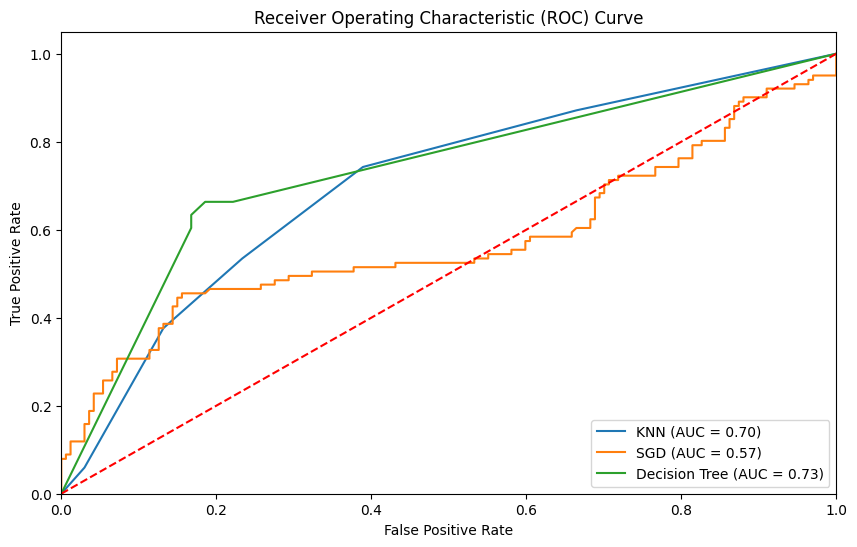

In [40]:
print("KNN Metrics:")
print(f"Accuracy: {accuracy_score(y_test, KNN_pred):.4f}")
print(f"Precision: {precision_score(y_test, KNN_pred):.4f}")
print(f"Recall: {recall_score(y_test, KNN_pred):.4f}")
print(f"F1-Score: {f1_score(y_test, KNN_pred):.4f}\n")

plt.figure(figsize=(10, 6))
plt.plot(knn_fpr, knn_tpr, label='KNN (AUC = %0.2f)' % KNN_roc_auc)
plt.plot(sgd_fpr, sgd_tpr, label='SGD (AUC = %0.2f)' % sgd_roc_auc)
plt.plot(tree_fpr, tree_tpr, label='Decision Tree (AUC = %0.2f)' % tree_roc_auc)
plt.plot([0, 1], [0, 1], 'r--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.legend(loc="lower right")
plt.show()

SGD Metrics:
Accuracy: 0.6604
Precision: 0.8571
Recall: 0.1188
F1-Score: 0.2087



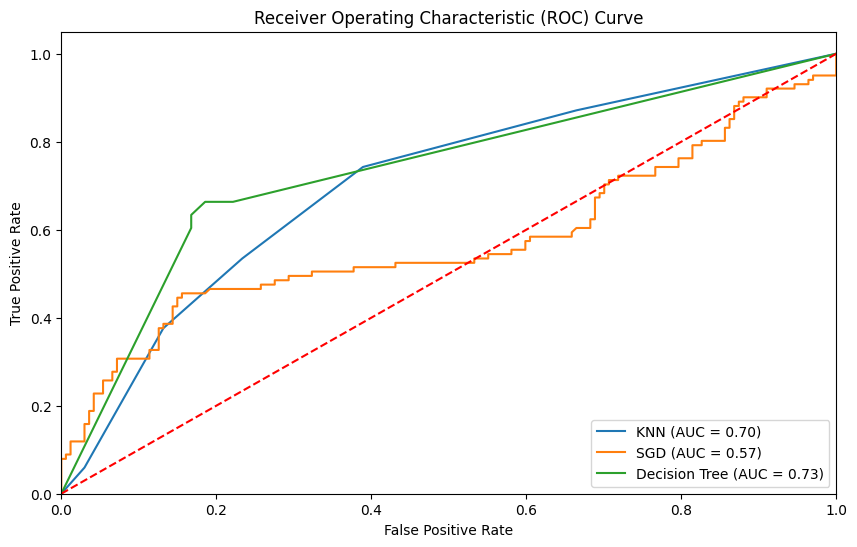

In [41]:
print("SGD Metrics:")
print(f"Accuracy: {accuracy_score(y_test, sgd_pred):.4f}")
print(f"Precision: {precision_score(y_test, sgd_pred):.4f}")
print(f"Recall: {recall_score(y_test, sgd_pred):.4f}")
print(f"F1-Score: {f1_score(y_test, sgd_pred):.4f}\n")


plt.figure(figsize=(10, 6))
plt.plot(knn_fpr, knn_tpr, label='KNN (AUC = %0.2f)' % KNN_roc_auc)
plt.plot(sgd_fpr, sgd_tpr, label='SGD (AUC = %0.2f)' % sgd_roc_auc)
plt.plot(tree_fpr, tree_tpr, label='Decision Tree (AUC = %0.2f)' % tree_roc_auc)
plt.plot([0, 1], [0, 1], 'r--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.legend(loc="lower right")
plt.show()

Decision Tree Metrics:
Accuracy: 0.7575
Precision: 0.6957
Recall: 0.6337
F1-Score: 0.6632



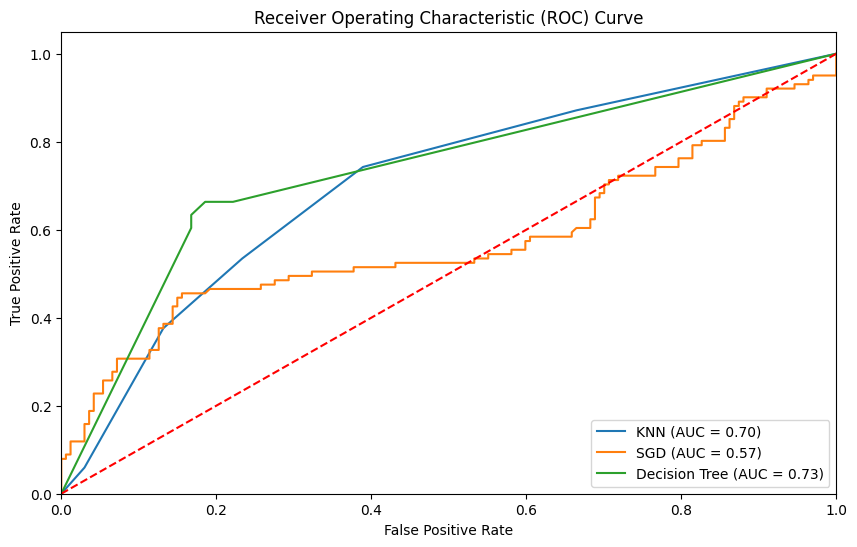

In [42]:

print("Decision Tree Metrics:")
print(f"Accuracy: {accuracy_score(y_test, tree_pred):.4f}")
print(f"Precision: {precision_score(y_test, tree_pred):.4f}")
print(f"Recall: {recall_score(y_test, tree_pred):.4f}")
print(f"F1-Score: {f1_score(y_test, tree_pred):.4f}\n")


plt.figure(figsize=(10, 6))
plt.plot(knn_fpr, knn_tpr, label='KNN (AUC = %0.2f)' % KNN_roc_auc)
plt.plot(sgd_fpr, sgd_tpr, label='SGD (AUC = %0.2f)' % sgd_roc_auc)
plt.plot(tree_fpr, tree_tpr, label='Decision Tree (AUC = %0.2f)' % tree_roc_auc)
plt.plot([0, 1], [0, 1], 'r--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.legend(loc="lower right")
plt.show()

In [43]:
from sklearn.linear_model import SGDClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import cross_val_score

In [44]:
KNN = KNeighborsClassifier()

scores_accuracy = cross_val_score(KNN, X, y, cv=5, scoring="accuracy")

print(scores_accuracy)
print("Rata-Rata Nilai Akurasi: %0.2f (+/- %0.2f)" % (scores_accuracy.mean(), scores_accuracy.std()))

scores_precision = cross_val_score(KNN, X, y, cv=5, scoring="precision_macro")

print(scores_precision)
print("Rata-Rata Nilai Precision Macro: %0.2f (+/- %0.2f)" % (scores_precision.mean(), scores_precision.std()))

scores_recall = cross_val_score(KNN, X, y, cv=5, scoring="recall_macro")

print(scores_recall)
print("Rata-Rata Nilai Recall Macro: %0.2f (+/- %0.2f)" % (scores_recall.mean(), scores_recall.std()))

scores_f1 = cross_val_score(KNN, X, y, cv=5, scoring="f1_macro")

print(scores_f1)
print("Rata-Rata Nilai F1 Macro: %0.2f (+/- %0.2f)" % (scores_f1.mean(), scores_f1.std()))

[0.66480447 0.69101124 0.71348315 0.73033708 0.71348315]
Rata-Rata Nilai Akurasi: 0.70 (+/- 0.02)
[0.64347291 0.67238134 0.69646223 0.71759259 0.69758065]
Rata-Rata Nilai Precision Macro: 0.69 (+/- 0.03)
[0.63814229 0.67139037 0.68114973 0.6947861  0.68893764]
Rata-Rata Nilai Recall Macro: 0.67 (+/- 0.02)
[0.63998391 0.67186191 0.68561039 0.70071459 0.69201018]
Rata-Rata Nilai F1 Macro: 0.68 (+/- 0.02)


In [45]:
SGD = SGDClassifier(loss='log_loss', random_state=27)
scores_sgd_accuracy = cross_val_score(SGD, X, y, cv=5, scoring="accuracy")
scores_sgd_precision = cross_val_score(SGD, X, y, cv=5, scoring="precision_macro")
scores_sgd_recall = cross_val_score(SGD, X, y, cv=5, scoring="recall_macro")
scores_sgd_f1 = cross_val_score(SGD, X, y, cv=5, scoring="f1_macro")

print("SGD - Akurasi: %0.2f (+/- %0.2f)" % (scores_sgd_accuracy.mean(), scores_sgd_accuracy.std()))
print("SGD - Precision: %0.2f (+/- %0.2f)" % (scores_sgd_precision.mean(), scores_sgd_precision.std()))
print("SGD - Recall: %0.2f (+/- %0.2f)" % (scores_sgd_recall.mean(), scores_sgd_recall.std()))
print("SGD - F1-Score: %0.2f (+/- %0.2f)" % (scores_sgd_f1.mean(), scores_sgd_f1.std()))

SGD - Akurasi: 0.72 (+/- 0.05)
SGD - Precision: 0.75 (+/- 0.06)
SGD - Recall: 0.67 (+/- 0.07)
SGD - F1-Score: 0.66 (+/- 0.09)


In [46]:
DT = DecisionTreeClassifier(random_state=27)
scores_dt_accuracy = cross_val_score(DT, X, y, cv=5, scoring="accuracy")
scores_dt_precision = cross_val_score(DT, X, y, cv=5, scoring="precision_macro")
scores_dt_recall = cross_val_score(DT, X, y, cv=5, scoring="recall_macro")
scores_dt_f1 = cross_val_score(DT, X, y, cv=5, scoring="f1_macro")

print("Decision Tree - Akurasi: %0.2f (+/- %0.2f)" % (scores_dt_accuracy.mean(), scores_dt_accuracy.std()))
print("Decision Tree - Precision: %0.2f (+/- %0.2f)" % (scores_dt_precision.mean(), scores_dt_precision.std()))
print("Decision Tree - Recall: %0.2f (+/- %0.2f)" % (scores_dt_recall.mean(), scores_dt_recall.std()))
print("Decision Tree - F1-Score: %0.2f (+/- %0.2f)" % (scores_dt_f1.mean(), scores_dt_f1.std()))

Decision Tree - Akurasi: 0.78 (+/- 0.03)
Decision Tree - Precision: 0.76 (+/- 0.03)
Decision Tree - Recall: 0.76 (+/- 0.04)
Decision Tree - F1-Score: 0.76 (+/- 0.03)


In [55]:
import pandas as pd
from sklearn.naive_bayes import GaussianNB
from sklearn.model_selection import train_test_split
from sklearn.impute import SimpleImputer

train_data = pd.read_csv('/content/Eps2-Data-train.csv')
test_data = pd.read_csv('/content/Eps5-Data-test.csv')

train_data['Sex'] = train_data['Sex'].map({'male': 0, 'female': 1})
test_data['Sex'] = test_data['Sex'].map({'male': 0, 'female': 1})

train_data = train_data.drop(columns=['Cabin'])
test_data = test_data.drop(columns=['Cabin'])

x_train = train_data.drop(columns=['Survived', 'Name', 'Ticket', 'Fare', 'Embarked', 'SibSp', 'Parch', 'Pclass'])
y_train = train_data['Survived']

x_test = test_data.drop(columns=['Survived', 'Name', 'Ticket', 'Fare', 'Embarked', 'SibSp', 'Parch', 'Pclass'], errors='ignore')

imputer = SimpleImputer(strategy='mean')
x_train = imputer.fit_transform(x_train)

x_test = imputer.transform(x_test)

nb_model = GaussianNB()
nb_model.fit(x_train, y_train)

test_predictions = nb_model.predict(x_test)

test_data['Survived'] = test_predictions
test_data.to_csv('test_with_predictions.csv', index=False)

print("Predictions saved to test_with_predictions.csv")


Predictions saved to test_with_predictions.csv
